# Round 1

Import the required libraries and modules that you would need.
Read that data into Python and call the dataframe churnData.
Check the datatypes of all the columns in the data.You would see that the column TotalCharges is object type.
Convert this column into numeric type using pd.to_numeric function.
Check for null values in the dataframe. Replace the null values.
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Split the data into a training set and a test set.
Scale the features either by using MinMaxScaler or a standard scaler.
(Optional) Encode the categorical variables so you can use them for modeling later.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [4]:
churnData = pd.read_csv("/Users/vincentwakim/Documents/LABS_0116/module_3/COURSES/DATA_Customer-Churn.txt",na_values=" ")

In [5]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
churnData.iloc[488,:]

gender                Female
SeniorCitizen              0
Partner                  Yes
Dependents               Yes
tenure                     0
PhoneService              No
OnlineSecurity           Yes
OnlineBackup              No
DeviceProtection         Yes
TechSupport              Yes
StreamingTV              Yes
StreamingMovies           No
Contract            Two year
MonthlyCharges         52.55
TotalCharges             NaN
Churn                     No
Name: 488, dtype: object

In [8]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churnData[churnData["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [10]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [11]:
churnData["TotalCharges"].fillna(0,inplace=True)

In [12]:
churnDatamod = churnData[["tenure", "SeniorCitizen", "MonthlyCharges","TotalCharges"]]

In [13]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split the data into training and testing sets using sklearn's train_test_split function.
    
    Parameters:
    X (pandas DataFrame): The feature matrix
    y (pandas Series): The target variable
    test_size (float): The proportion of data to include in the test set
    random_state (int): The random seed to use for reproducibility
    
    Returns:
    X_train (pandas DataFrame): The feature matrix for the training set
    X_test (pandas DataFrame): The feature matrix for the testing set
    y_train (pandas Series): The target variable for the training set
    y_test (pandas Series): The target variable for the testing set
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [14]:
X = churnDatamod.copy()
y = churnData["Churn"]

In [15]:
y = np.where(y=="No",0,1)

In [16]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [17]:
y.shape

(7043,)

In [18]:
#Another form of changing Yes and No to 0 and 1
#y_train= y_train.map({"Yes":1, "No":0}).astype(int)

In [19]:
X_train, X_test, y_train, y_test = split_data(X,y, test_size = 0.2)

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_mod = scaler.transform(X_train)
X_test_mod  = scaler.transform(X_test)

In [22]:
def check_effect_strategy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)


    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train),
                                            precision_score(y_train, y_pred_train),
                                            recall_score(y_train, y_pred_train)],
                                'Test': [accuracy_score(y_test, y_pred_test),
                                            precision_score(y_test, y_pred_test),
                                            recall_score(y_test, y_pred_test)]})

    display(performance_df)
    cm = confusion_matrix( y_train, y_pred_train)
    cm2 = confusion_matrix( y_test, y_pred_test)

    fig, axes = plt.subplots(1,2,figsize=(14,4))
    ax1 = axes.flatten()[0]
    ax2 = axes.flatten()[1]
    ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=["No","Yes"]).plot(ax=ax1)
    ConfusionMatrixDisplay(confusion_matrix=cm2,
                                display_labels=["No","Yes"]).plot(ax=ax2)
    return performance_df,fig, y_pred_train,y_pred_test

# Round 2

(Optional) Fit a logistic Regression model on the training data.
Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.
Fit a Decision Tree Classifier on the training data.
Compare the accuracy, precision, recall for the previous models on both the train and test sets.

In [23]:
model_knn = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model_knn.fit(X_train_mod, y_train) # train model
y_pred = model_knn.predict(X_test_mod) # predict test
y_pred_train=model_knn.predict(X_train_mod) # predict train (for sanity checks)

In [24]:
y_pred_train

array([0, 0, 1, ..., 0, 1, 0])

In [25]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

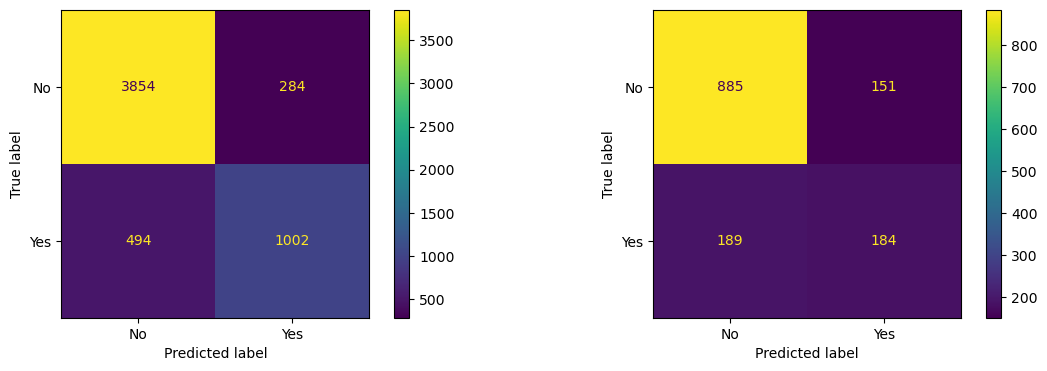

In [26]:
cm = confusion_matrix( y_train, y_pred_train)
cm2 = confusion_matrix( y_test, y_pred)

fig, axes = plt.subplots(1,2,figsize=(14,4))
ax1 = axes.flatten()[0]
ax2 = axes.flatten()[1]
ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=["No","Yes"]).plot(ax=ax1)
ConfusionMatrixDisplay(confusion_matrix=cm2,
                            display_labels=["No","Yes"]).plot(ax=ax2)

In [27]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.861910,0.758694
1,Precision,0.779160,0.549254
2,Recall,0.669786,0.493298


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model_tree = DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred_train_dt = model_tree.predict(X_train)
y_pred_test_dt = model_tree.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


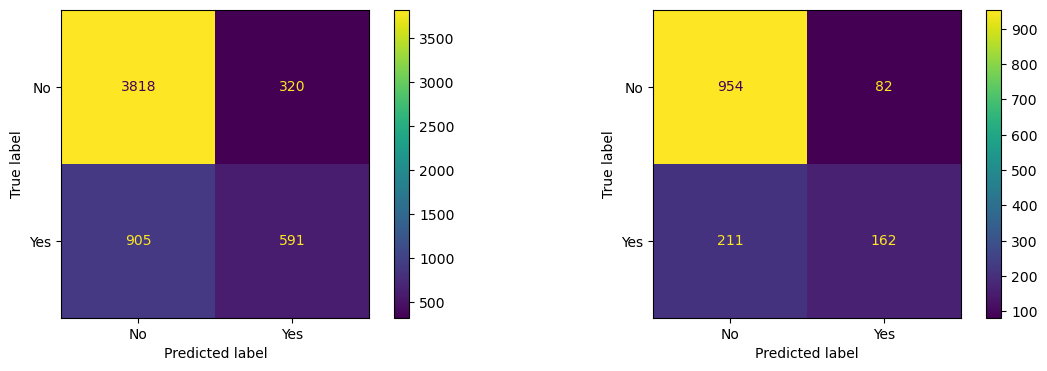

In [31]:
cm = confusion_matrix( y_train, y_pred_train_dt)
cm2 = confusion_matrix( y_test, y_pred_test_dt)

fig, axes = plt.subplots(1,2,figsize=(14,4))
ax1 = axes.flatten()[0]
ax2 = axes.flatten()[1]
ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=["No","Yes"]).plot(ax=ax1)
ConfusionMatrixDisplay(confusion_matrix=cm2,
                            display_labels=["No","Yes"]).plot(ax=ax2)

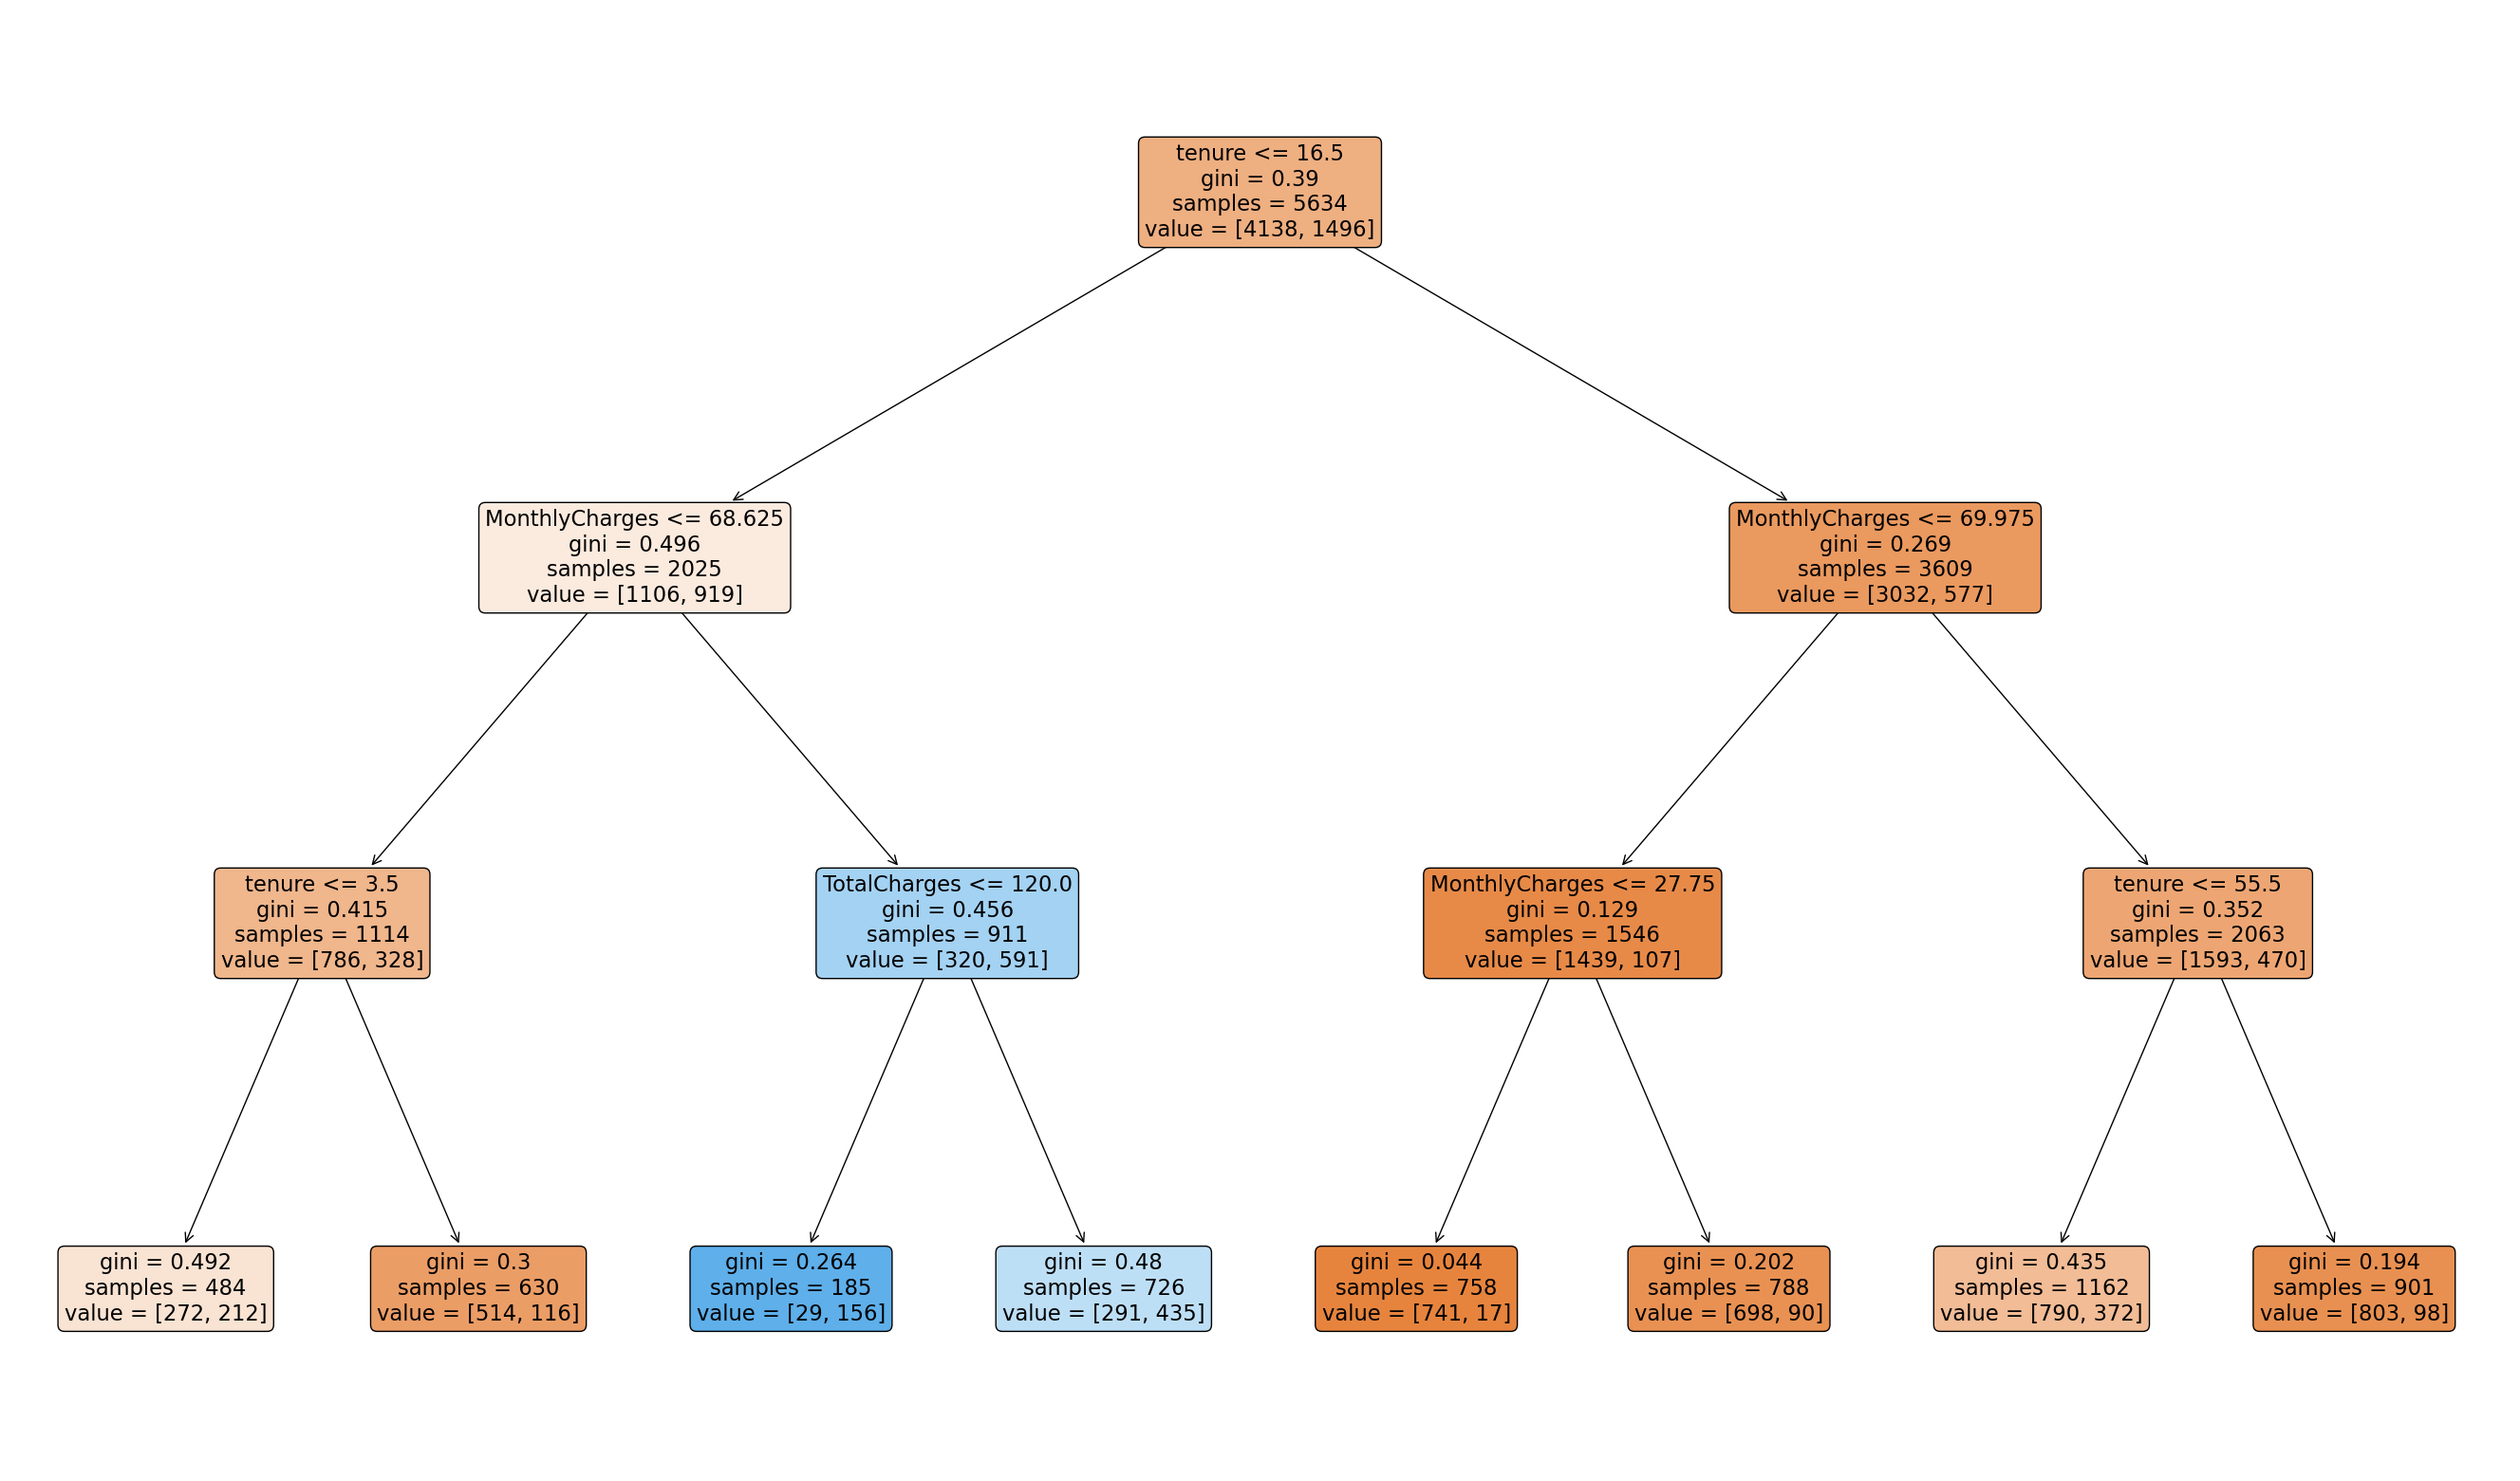

In [32]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model_tree,filled = True, rounded=True,feature_names=X_train.columns)
plt.show() 

   # Round 3

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [34]:
print("X_train has %d rows and %d columns"  %(X_train.shape[0],X_train.shape[1]))
print("-----------------------------------")
print("The coefficient of determination for the test data is R2=%.2f"
      %(model_tree.score(X_test, y_test)))
print("The coefficient of determination for the train data is R2=%.2f"
      %(model_tree.score(X_train, y_train)))

X_train has 5634 rows and 4 columns
-----------------------------------
The coefficient of determination for the test data is R2=0.79
The coefficient of determination for the train data is R2=0.78


In [35]:
scores=cross_val_score(model_tree, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.78615794 0.78793256 0.76397516 0.78083407 0.77886323]
Score stats: 0.78 accuracy with a standard deviation of 0.01


In [36]:
scores=cross_val_score(model_knn, X_train_mod, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.7755102  0.75510204 0.74267968 0.78172138 0.74067496]
Score stats: 0.76 accuracy with a standard deviation of 0.02


# Round 4

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [38]:
model_rf = RandomForestClassifier()

,Error_metric,Train,Test
0,Accuracy,0.990770,0.768630
1,Precision,0.980692,0.578073
2,Recall,0.984626,0.466488


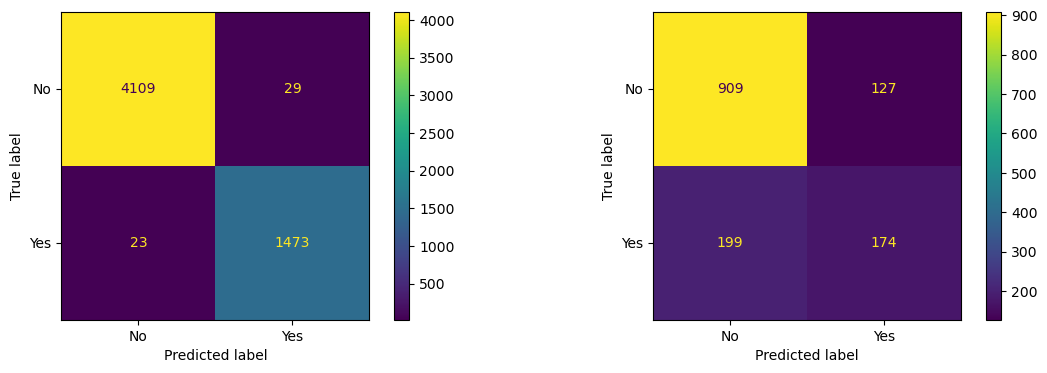

In [39]:
performance_df,fig, y_pred_train,y_pred_test = check_effect_strategy(model_rf, X_train, y_train, X_test, y_test)

In [40]:
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=42)

In [41]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)

In [ ]:
grid_search.fit(X_train_mod,y_train)

In [ ]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
clf = RandomForestClassifier(random_state=42, **best_params)
cross_val_scores = cross_val_score(clf, X_test_mod, y_test, cv=5)
print(np.mean(cross_val_scores))

In [ ]:
performance_df,fig, y_pred_train,y_pred_test = check_effect_strategy(clf, X_train, y_train, X_test, y_test)

# Managing imbalance in the dataset

Check for the imbalance. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes. Each time fit the model and check the accuracy of the model.

In [ ]:
churnData.value_counts("Churn")

# Downsampling

In [ ]:
churnData

In [ ]:
churnDatamod

In [ ]:
churnDatamod
X = churnDatamod.copy()
y = churnData.loc[:,["Churn"]]
y

In [ ]:
#y = np.where(y=="Yes",1,0)
y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)
y

In [ ]:
X_train, X_test, y_train, y_test = split_data(X,y, test_size = 0.2)

In [ ]:
def downsampling(X,y, column_target="Churn"):
    data = pd.concat([X,y],axis=1)
    category_0 = data[data[column_target] == 0] # negative class (majority)
    category_1 = data[data[column_target] == 1] # positive class (minority)
    # downsample the majority class to the size of the positive class using pandas sample method
    c1_len = len(category_1)
    category_0_down = category_0.sample(c1_len)
    print(category_0_down.shape)
    print(category_1.shape)
    # reassemble the data
    data_down = pd.concat([category_0_down, category_1], axis=0)
    # shuffle the data
    data_down = data_down.sample(frac=1) # frac spe
    X_down = data_down[X.columns]
    y_down = data_down[column_target]
    return X_down, y_down

def upsamplingSMOTE(X,y, column_target="Churn"):
    data = pd.concat([X,y],axis=1)
    category_0 = data[data[column_target] == 0] # negative class (majority)
    category_1 = data[data[column_target] == 1] # positive class (minority)
    # downsample the majority class to the size of the positive class using pandas sample method
    c1_len = len(category_1)
    category_0_down = category_0.sample(c1_len)
    print(category_0_down.shape)
    print(category_1.shape)
    # reassemble the data
    data_down = pd.concat([category_0_down, category_1], axis=0)
    # shuffle the data
    data_down = data_down.sample(frac=1) # frac spe
    X_down = data_down[X.columns]
    y_down = data_down[column_target]
    return X_down, y_down

In [ ]:
X_train_down, y_train_down = downsampling(X_train, y_train, column_target="Churn")

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_down)
X_train_mod = scaler.transform(X_train_down)
X_test_mod  = scaler.transform(X_test)

In [ ]:
print(X_train_mod.shape)
y_train_down.shape

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model

In [ ]:
performance_df,fig, y_pred_train,y_pred_test = check_effect_strategy(model_knn, X_train_mod, y_train_down, X_test_mod, y_test)

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=3)
performance_df,fig, y_pred_train,y_pred_test = check_effect_strategy(model_tree, X_train_down, y_train_down, X_test_mod, y_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_sm)
X_train_mod = scaler.transform(X_sm)
X_test_mod  = scaler.transform(X_test)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
performance_df,fig, y_pred_train,y_pred_test = check_effect_strategy(model_knn, X_train_mod, y_sm, X_test_mod, y_test)

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=3)

performance_df,fig, y_pred_train,y_pred_test = check_effect_strategy(model_tree, X_sm, y_sm, X_test, y_test)

In [ ]:
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_sm, y_sm)

In [ ]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

In [ ]:
clf = RandomForestClassifier(random_state=42, **best_params)
cross_val_scores = cross_val_score(clf, X_sm, y_sm, cv=5)
print(np.mean(cross_val_scores))